IPOD Dataset Exploration
===

Exploring the IPOD dataset.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

In [3]:
from pathlib import Path
from collections import Counter
from tqdm import tqdm
from IPython.core.display import display, HTML

In [4]:
# data is stored relative to the root of the git repository
git_root_dir = !git rev-parse --show-toplevel
git_root_dir = Path(git_root_dir[0].strip())
git_root_dir

PosixPath('/home/levoniaz/repos/ipod-dataset-exploration')

In [7]:
data_dir = git_root_dir / 'data'
assert data_dir.exists()
ner_data_filepath = data_dir / "NER_corpus_Collated_Positions_All_18June2020.csv"
gazetteer_filepath = data_dir / "gazetteer.csv"
assert ner_data.exists() and gazetteer.exists()

### Load the gazetteer

In [8]:
gazetteer = pd.read_csv(gazetteer_filepath)
len(gazetteer)

1500

In [9]:
gazetteer.sample(n=10)

,Title,A1,A2,A3
141,procurement,FUN,FUN,FUN
901,seo,O,O,O
1312,panel,FUN,FUN,O
740,examiner,RES,RES,O
626,adviser,RES,RES,RES
1185,salesperson,RES,RES,RES
1199,esl,O,O,O
256,broker,RES,RES,RES
1127,columnist,RES,RES,O
1496,agm,O,O,O


In [14]:
for annotations, count in Counter([f"{row.A1} {row.A2} {row.A3}" for row in gazetteer.itertuples()]).most_common():
    print(f"{annotations:>20} {count:>4}")

         FUN FUN FUN  584
               O O O  290
         RES RES RES  261
           FUN FUN O  166
           RES RES O   58
         LOC LOC LOC   34
             O O nan   34
         FUN FUN RES   10
             FUN O O    8
         RES FUN FUN    7
         RES RES FUN    6
             O O RES    6
             O O FUN    6
         FUN RES RES    5
         RES LOC LOC    4
             RES O O    4
           O FUN FUN    4
           LOC LOC O    3
           O RES RES    2
         LOC RES RES    2
         RES RES LOC    1
         LOC LOC FUN    1
             LOC O O    1
           O LOC LOC    1
         FUN FUN LOC    1
           FUN O FUN    1


### Load the NER data

In [15]:
df = pd.read_csv(ner_data_filepath)
len(df)

475073

In [16]:
df.head()

,Original_Title,Processed_Title,Tag_A1,BIOES_Tag_A1,Tag_A2,BIOES_Tag_A2,Tag_A3,BIOES_Tag_A3
0,Senior Manager,senior manager,RES RES,B-RES E-RES,RES RES,B-RES E-RES,RES RES,B-RES E-RES
1,Financial Controller,financial controller,FUN RES,S-FUN S-RES,FUN RES,S-FUN S-RES,FUN RES,S-FUN S-RES
2,Acting Financial Controller,acting financial controller,RES FUN RES,S-RES S-FUN S-RES,RES FUN RES,S-RES S-FUN S-RES,RES FUN RES,S-RES S-FUN S-RES
3,Assistant Manager,assistant manager,RES RES,B-RES E-RES,RES RES,B-RES E-RES,RES RES,B-RES E-RES
4,Audit Senior,audit senior,FUN RES,S-FUN S-RES,FUN RES,S-FUN S-RES,FUN RES,S-FUN S-RES


In [19]:
Counter(df.Original_Title).most_common(20)

[('Director', 3516),
 ('Project Manager', 3049),
 ('Intern', 2918),
 ('Manager', 2458),
 ('Managing Director', 2220),
 ('Software Engineer', 2143),
 ('General Manager', 1991),
 ('Consultant', 1974),
 ('Assistant Manager', 1740),
 ('Business Development Manager', 1535),
 ('Account Manager', 1484),
 ('Associate', 1484),
 ('Sales Manager', 1475),
 ('Project Engineer', 1422),
 ('Finance Manager', 1405),
 ('CEO', 1318),
 ('Accountant', 1302),
 ('Vice President', 1272),
 ('Owner', 1253),
 ('Senior Software Engineer', 1190)]

In [20]:
Counter(df.Processed_Title).most_common(20)

[('director', 3597),
 ('project manager', 3119),
 ('intern', 2940),
 ('manager', 2558),
 ('managing director', 2250),
 ('software engineer', 2192),
 ('general manager', 2037),
 ('consultant', 2011),
 ('assistant manager', 1764),
 ('sales manager', 1571),
 ('business development manager', 1554),
 ('account manager', 1509),
 ('associate', 1489),
 ('project engineer', 1457),
 ('finance manager', 1428),
 ('ceo', 1332),
 ('accountant', 1320),
 ('vice president', 1291),
 ('owner', 1286),
 ('senior manager', 1209)]

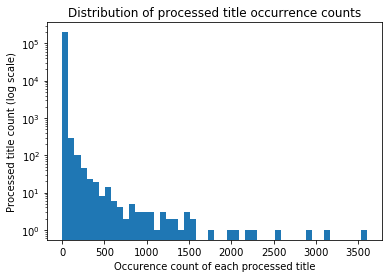

In [28]:
plt.hist(list(Counter(df.Processed_Title).values()), bins=50, log=True)
plt.xlabel("Occurence count of each processed title")
plt.ylabel("Processed title count (log scale)")
plt.title("Distribution of processed title occurrence counts")
plt.show()

### Examine the tag patterns

In [32]:
# just using the first annotator's tags....
tags = [row.Tag_A1.split() for row in df.itertuples()]
tags[0]

['RES', 'RES']

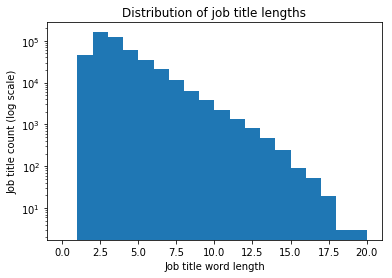

In [36]:
plt.hist([len(tag) for tag in tags], log=True, bins=range(21))
plt.xlabel("Job title word length")
plt.ylabel("Job title count (log scale)")
plt.title("Distribution of job title lengths")
plt.show()

In [38]:
long_tags = [" ".join(tag) for tag in tags if len(tag) > 10]
Counter(long_tags).most_common(10)

[('O O O O O O O O O O O O', 9),
 ('O O O O O O O O O O O', 6),
 ('RES FUN RES O O O O O O O O', 4),
 ('RES O FUN O FUN FUN O O O O O', 4),
 ('RES O O O O O O O O O O O', 4),
 ('FUN O FUN FUN FUN O O O O O O O', 3),
 ('RES RES O O O LOC RES FUN O O O', 3),
 ('RES O O O O O O O O O O', 3),
 ('RES FUN RES O O O FUN O O O O', 3),
 ('FUN FUN RES LOC LOC LOC FUN FUN FUN FUN O FUN', 3)]

In [40]:
# A1's tag counts
Counter(df.Tag_A1).most_common(20)

[('FUN RES', 97069),
 ('RES', 38742),
 ('FUN FUN RES', 35579),
 ('RES RES', 35090),
 ('RES FUN RES', 33849),
 ('O RES', 13734),
 ('O FUN RES', 6989),
 ('FUN RES RES', 5865),
 ('RES RES RES', 5816),
 ('RES FUN FUN RES', 5787),
 ('O', 5657),
 ('FUN O FUN RES', 5367),
 ('RES FUN FUN', 4991),
 ('RES O RES', 4819),
 ('RES RES FUN FUN', 4256),
 ('RES RES FUN', 3650),
 ('FUN FUN', 3474),
 ('RES O FUN', 3421),
 ('FUN FUN FUN RES', 3373),
 ('RES FUN', 2927)]